In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
unknownRankLimit = 20000


In [2]:
raw_LP = pd.read_csv("e_actionsLP.csv", sep=";")
raw_JL = pd.read_csv("e_actionsJL.csv", sep=";")

In [3]:
raw_LP["operator"] = "LP"
raw_LP["time"] = raw_LP["time"]+1
raw_LP["ts"] = raw_LP["ts"]+1
raw_LP["ts1"] = raw_LP["ts1"]+1
raw_LP["ts2"] = raw_LP["ts2"]+1

#adjusting the filter time just as the normal time
raw_LP.loc[((raw_LP.category == "BROWSING") & ((raw_LP.type.str.contains("VideoDetailClose")) | (raw_LP.type.str.contains("SimilarityDetailClose") ) )),"filter"] = raw_LP.loc[((raw_LP.category == "BROWSING") & ((raw_LP.type.str.contains("VideoDetailClose")) | (raw_LP.type.str.contains("SimilarityDetailClose") ) )),"filter"].astype(int)+1

raw_JL["operator"] = "JL"

In [4]:
rawData = raw_LP.append(raw_JL, ignore_index=True)

In [5]:
#rawData.loc[rawData["type"]=="RESET"]

In [6]:
rawData["timeRef"] = -1
ftime = rawData.loc[((rawData.category == "BROWSING") & ((rawData.type.str.contains("VideoDetailClose")) | (rawData.type.str.contains("SimilarityDetailClose") ) )),"filter"]
taskStartTime = rawData.loc[((rawData.category == "BROWSING") & ((rawData.type.str.contains("VideoDetailClose")) | (rawData.type.str.contains("SimilarityDetailClose") ) )),"ts1"]
rawData.loc[((rawData.category == "BROWSING") & ((rawData.type.str.contains("VideoDetailClose")) | (rawData.type.str.contains("SimilarityDetailClose") ) )),"timeRef"] = ftime.astype(int) - taskStartTime.astype(int)

In [7]:
rawData = rawData.sort_values("ts")
print(rawData.shape)
rawData["time"] = rawData["time"] -5
rawData["timeRef"] = rawData["timeRef"] -5
rawData.drop(rawData.loc[rawData["time"]<=0].index, inplace=True)
rawData.drop(rawData.loc[((rawData["category"]=="SUBMIT") & (rawData["filter"].str.startswith('{"submission":"WRONG"')))].index, inplace=True)
rawData.drop(rawData.loc[rawData["type"]=="RESET"].index, inplace=True)
rawData.drop(rawData.loc[rawData["type"]=="1P/Video"].index, inplace=True)
rawData.drop(rawData.loc[rawData["type"]=="2P/Video"].index, inplace=True)
rawData.drop(rawData.loc[rawData["type"]=="5P/Video"].index, inplace=True)
rawData.drop(rawData.loc[rawData["type"]=="VideoDetailSortBySimilarity"].index, inplace=True)
print(rawData.shape)

(355, 16)
(327, 16)


In [8]:
serverSideSubmissions = pd.read_csv("cvhunter_correct_sub_times.csv", sep=",")
serverSideSubmissions["timeSubmission"] = serverSideSubmissions["timeMs"]/1000
serverSideCorrectSub = serverSideSubmissions.loc[serverSideSubmissions["timeMs"]!=-1]
serverSideCorrectSub

,taskID,timestamp,taskStartTimestamp,timeMs,timeSubmission
0,vbs22-kis-t01,1654506292794,1654506259200,33594,33.594
1,vbs22-kis-t02,1654506930177,1654506756888,173289,173.289
2,vbs22-kis-t03,1654507356862,1654507323442,33420,33.420
4,vbs22-kis-t07,1654511400710,1654511377468,23242,23.242
5,vbs22-kis-v01,1654512146600,1654511967804,178796,178.796
6,vbs22-kis-t08,1654512918606,1654512640781,277825,277.825
7,vbs22-kis-t09,1654513124617,1654513097914,26703,26.703
8,vbs22-kis-t10,1654513537627,1654513512689,24938,24.938
9,vbs22-kis-t11,1654514401207,1654513988401,412806,412.806
10,vbs22-kis-t12,1654514521575,1654514459547,62028,62.028


In [9]:
for idx, row in serverSideCorrectSub.iterrows():
    rawData.loc[((rawData["name"]==row["taskID"])&(rawData["category"]=="SUBMIT")&(rawData["filter"].str.contains("CORRECT"))),"time"] = row["timeSubmission"]
    rawData.loc[((rawData["name"]==row["taskID"])&(rawData["category"]=="SUBMIT")&(rawData["filter"].str.contains("CORRECT"))),"ts"] = row["timestamp"]/1000
rawData.loc[rawData["category"]=="SUBMIT"]    

,name,ts1,ts2,GT,LogSize,Rank GT+2x5s,Rank,VideoRank,time,ts,category,type,query,filter,operator,timeRef
3,vbs22-kis-t01,1654506255,1654506680,13964: 7595-7850 : 25,NaN,NaN,NaN,NaN,33.594,1.654506e+09,SUBMIT,NaN,?item=13964&frame=7694&session=node0tp720dt9nc...,"{""submission"":""CORRECT"" ""description"":""Submiss...",LP,-6
9,vbs22-kis-t02,1654506753,1654507178,5863: 2650-2950 : 25,NaN,NaN,NaN,NaN,173.289,1.654507e+09,SUBMIT,NaN,?item=05863&frame=2919&session=node0tp720dt9nc...,"{""submission"":""CORRECT"" ""description"":""Submiss...",LP,-6
13,vbs22-kis-t03,1654507319,1654507744,12262: 128-375 : 25,NaN,NaN,NaN,NaN,33.420,1.654507e+09,SUBMIT,NaN,?item=12262&frame=344&session=node0tp720dt9nch...,"{""submission"":""CORRECT"" ""description"":""Submiss...",LP,-6
29,vbs22-kis-t07,1654511373,1654511798,3869: 3980-4124 : 23.976025,NaN,NaN,NaN,NaN,23.242,1.654511e+09,SUBMIT,NaN,?item=03869&frame=4052&session=node0tp720dt9nc...,"{""submission"":""CORRECT"" ""description"":""Submiss...",LP,-6
229,vbs22-kis-v01,1654511963,1654512268,6040: 2350-2725 : 25,NaN,NaN,NaN,NaN,178.796,1.654512e+09,SUBMIT,NaN,?item=06040&frame=2506&session=node04s1bujgqrq...,"{""submission"":""CORRECT"" ""description"":""Submiss...",JL,-6
50,vbs22-kis-t08,1654512637,1654513062,13108: 3230-3450 : 25,NaN,NaN,NaN,NaN,277.825,1.654513e+09,SUBMIT,NaN,?item=13108&frame=3356&session=node0tp720dt9nc...,"{""submission"":""CORRECT"" ""description"":""Submiss...",LP,-6
52,vbs22-kis-t09,1654513094,1654513428,6057: 33600-34830 : 30,NaN,NaN,NaN,NaN,26.703,1.654513e+09,SUBMIT,NaN,?item=06057&frame=34665&session=node0tp720dt9n...,"{""submission"":""CORRECT"" ""description"":""Submiss...",LP,-6
56,vbs22-kis-t10,1654513509,1654513934,12956: 4436-4603 : 23.976025,NaN,NaN,NaN,NaN,24.938,1.654514e+09,SUBMIT,NaN,?item=12956&frame=4454&session=node0tp720dt9nc...,"{""submission"":""CORRECT"" ""description"":""Submiss...",LP,-6
267,vbs22-kis-t11,1654513983,1654514408,15864: 312-623 : 23.976025,NaN,NaN,NaN,NaN,412.806,1.654514e+09,SUBMIT,NaN,?item=15864&frame=372&session=node04s1bujgqrqw...,"{""submission"":""CORRECT"" ""description"":""Submiss...",JL,-6
78,vbs22-kis-t12,1654514456,1654514881,7242: 1000-1300 : 25,NaN,NaN,NaN,NaN,62.028,1.654515e+09,SUBMIT,NaN,?item=07242&frame=1088&session=node0tp720dt9nc...,"{""submission"":""CORRECT"" ""description"":""Submiss...",LP,-6


In [10]:
rawData.loc[((raw_LP.category == "BROWSING") & ((rawData.type.str.contains("VideoDetailClose")) | (raw_LP.type.str.contains("SimilarityDetailClose") ) ))]


,name,ts1,ts2,GT,LogSize,Rank GT+2x5s,Rank,VideoRank,time,ts,category,type,query,filter,operator,timeRef
6,vbs22-kis-t02,1654506753,1654507178,5863: 2650-2950 : 25,NaN,NaN,NaN,NaN,151.0,1.654507e+09,BROWSING,VideoDetailClose,9200:750,1654506801,LP,43
64,vbs22-kis-t11,1654513984,1654514409,15864: 312-623 : 23.976025,NaN,NaN,NaN,NaN,150.0,1.654514e+09,BROWSING,VideoDetailClose,8493:4019,1654514113,LP,124
70,vbs22-kis-t11,1654513984,1654514409,15864: 312-623 : 23.976025,NaN,NaN,NaN,NaN,297.0,1.654514e+09,BROWSING,VideoDetailClose,8895:5574,1654514270,LP,281
91,vbs22-kis-v04,1654594550,1654594855,14057: 15533-15974 : 29.97003,NaN,NaN,NaN,NaN,34.0,1.654595e+09,BROWSING,VideoDetailClose,5674:1675,1654594575,LP,20
111,vbs22-kis-v06,1654595287,1654595592,15870: 2050-2275 : 25,NaN,NaN,NaN,NaN,55.0,1.654595e+09,BROWSING,VideoDetailClose,8344:4686,1654595329,LP,37
116,vbs22-kis-v06,1654595287,1654595592,15870: 2050-2275 : 25,NaN,NaN,NaN,NaN,100.0,1.654595e+09,BROWSING,VideoDetailClose,559:2532,1654595362,LP,70
119,vbs22-kis-v06,1654595287,1654595592,15870: 2050-2275 : 25,NaN,NaN,NaN,NaN,160.0,1.654595e+09,BROWSING,SimilarityDetailClose,559:2892,1654595402,LP,110
124,vbs22-kis-v06,1654595287,1654595592,15870: 2050-2275 : 25,NaN,NaN,NaN,NaN,214.0,1.654596e+09,BROWSING,VideoDetailClose,559:2532,1654595453,LP,161
125,vbs22-kis-v06,1654595287,1654595592,15870: 2050-2275 : 25,NaN,NaN,NaN,NaN,263.0,1.654596e+09,BROWSING,SimilarityDetailClose,559:2892,1654595402,LP,110
142,vbs22-kis-v08,1654598412,1654598717,6991: 3692-4172 : 23.976025,NaN,NaN,NaN,NaN,184.0,1.654599e+09,BROWSING,VideoDetailClose,13265:6390,1654598575,LP,158


In [11]:
submissionBorder = rawData.loc[((rawData["category"]=="SUBMIT") & (rawData["filter"].str.contains("CORRECT"))),["name","ts","operator"]]
submissionBorder

,name,ts,operator
3,vbs22-kis-t01,1.654506e+09,LP
9,vbs22-kis-t02,1.654507e+09,LP
13,vbs22-kis-t03,1.654507e+09,LP
29,vbs22-kis-t07,1.654511e+09,LP
229,vbs22-kis-v01,1.654512e+09,JL
50,vbs22-kis-t08,1.654513e+09,LP
52,vbs22-kis-t09,1.654513e+09,LP
56,vbs22-kis-t10,1.654514e+09,LP
267,vbs22-kis-t11,1.654514e+09,JL
78,vbs22-kis-t12,1.654515e+09,LP


In [12]:
filteredData = rawData.copy()
print(filteredData.shape)

for i,row in submissionBorder.iterrows():    
    filteredData = filteredData.drop(filteredData.loc[((filteredData["name"]==row["name"]) & (filteredData["ts"]>row["ts"]))].index)
print(filteredData.shape)

(327, 16)
(269, 16)


In [13]:
filteredData.head(50)

,name,ts1,ts2,GT,LogSize,Rank GT+2x5s,Rank,VideoRank,time,ts,category,type,query,filter,operator,timeRef
0,vbs22-kis-t01,1654506255,1654506680,13964: 7595-7850 : 25,10000.0,2.0,2.0,2.0,21.000,1.654506e+09,TEXT,JointEmbedding,CLIP: close-up of motorbike exhaust pipe being...,NaN,LP,-6
1,vbs22-kis-t01,1654506255,1654506680,13964: 7595-7850 : 25,NaN,NaN,NaN,NaN,29.000,1.654506e+09,BROWSING,DetailWindowOpen,13964:7706,NaN,LP,-6
2,vbs22-kis-t01,1654506255,1654506680,13964: 7595-7850 : 25,NaN,NaN,NaN,NaN,32.000,1.654506e+09,BROWSING,DetailWindowClose,13964:7706,NaN,LP,-6
3,vbs22-kis-t01,1654506255,1654506680,13964: 7595-7850 : 25,NaN,NaN,NaN,NaN,33.594,1.654506e+09,SUBMIT,NaN,?item=13964&frame=7694&session=node0tp720dt9nc...,"{""submission"":""CORRECT"" ""description"":""Submiss...",LP,-6
176,vbs22-kis-t02,1654506752,1654507177,5863: 2650-2950 : 25,10000.0,508.0,2168.0,244.0,19.000,1.654507e+09,TEXT,JointEmbedding,CLIP: wooden bridge seen from a creek,NaN,JL,-6
177,vbs22-kis-t02,1654506752,1654507177,5863: 2650-2950 : 25,NaN,NaN,NaN,NaN,26.000,1.654507e+09,BROWSING,VideoDetailOpen,1680:6200,NaN,JL,-6
178,vbs22-kis-t02,1654506752,1654507177,5863: 2650-2950 : 25,NaN,NaN,NaN,NaN,28.000,1.654507e+09,BROWSING,VideoDetailClose,1680:6200,1654506776,JL,19
179,vbs22-kis-t02,1654506752,1654507177,5863: 2650-2950 : 25,NaN,NaN,NaN,NaN,34.000,1.654507e+09,BROWSING,VideoDetailOpen,1680:6200,NaN,JL,-6
180,vbs22-kis-t02,1654506752,1654507177,5863: 2650-2950 : 25,NaN,NaN,NaN,NaN,40.000,1.654507e+09,BROWSING,VideoDetailClose,1680:6200,1654506776,JL,19
4,vbs22-kis-t02,1654506753,1654507178,5863: 2650-2950 : 25,10000.0,14.0,14.0,14.0,44.000,1.654507e+09,TEXT,JointEmbedding,Temporal CLIP: rocks hanging over a wooden wal...,NaN,LP,-6


In [14]:
filteredData.category.unique()

array(['TEXT', 'BROWSING', 'SUBMIT', 'IMAGE'], dtype=object)

In [15]:
filteredData.to_csv("CVHunter_filtered_data.csv")

In [16]:

rankableData = filteredData.loc[((filteredData.category != "BROWSING") & (filteredData.category != "SUBMIT"))]

rankableData["RankFilledNA"] = rankableData["Rank"]
rankableData["RankFilledNA"].fillna(unknownRankLimit, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lpeska\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
textData = rankableData.loc[rankableData.category == "TEXT"]

textData["QueryClean"] = textData["query"].str.replace("Temporal CLIP: ","").str.replace("CLIP: ","").str.replace("> ","").str.replace(">","").str.replace(":","")
textData["QueryWords"] = textData["QueryClean"].str.split().str.len()
textData["QueryLen"] = textData["QueryClean"].str.len()
textData["TemporalQuery"] = False
textData.loc[textData["query"].str.startswith("Temporal CLIP:"),"TemporalQuery"] = True

tempData = textData.loc[textData["query"].str.startswith("Temporal CLIP:")]
notempData = textData.loc[textData["query"].str.startswith("CLIP:")]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [18]:
print(rankableData.shape)
print(textData.shape)
print(tempData.shape)
print(notempData.shape)

(157, 17)
(129, 21)
(75, 21)
(53, 21)


In [19]:
tempData.to_csv("CVHunter_temporalQueriesOnly.csv")

- vast majority of the recorded actions are textual queries (130 out of 158)
    - out of them, 75 were temporal and 54 single-frame queries
    
[NOTE TO SELF]: what if we somehow accumulate relevance of surrounding temporal spaces even for single-frame queries?

In [20]:
textData.head()

,name,ts1,ts2,GT,LogSize,Rank GT+2x5s,Rank,VideoRank,time,ts,...,type,query,filter,operator,timeRef,RankFilledNA,QueryClean,QueryWords,QueryLen,TemporalQuery
0,vbs22-kis-t01,1654506255,1654506680,13964: 7595-7850 : 25,10000.0,2.0,2.0,2.0,21.0,1.654506e+09,...,JointEmbedding,CLIP: close-up of motorbike exhaust pipe being...,NaN,LP,-6,2.0,close-up of motorbike exhaust pipe being cleaned,7,48,False
176,vbs22-kis-t02,1654506752,1654507177,5863: 2650-2950 : 25,10000.0,508.0,2168.0,244.0,19.0,1.654507e+09,...,JointEmbedding,CLIP: wooden bridge seen from a creek,NaN,JL,-6,2168.0,wooden bridge seen from a creek,6,31,False
4,vbs22-kis-t02,1654506753,1654507178,5863: 2650-2950 : 25,10000.0,14.0,14.0,14.0,44.0,1.654507e+09,...,JointEmbedding,Temporal CLIP: rocks hanging over a wooden wal...,NaN,LP,-6,14.0,rocks hanging over a wooden walkway wooden bri...,11,62,True
181,vbs22-kis-t02,1654506752,1654507177,5863: 2650-2950 : 25,10000.0,143.0,255.0,80.0,91.0,1.654507e+09,...,JointEmbedding,Temporal CLIP: rocks on the right and gorge on...,NaN,JL,-6,255.0,rocks on the right and gorge on the left woode...,15,72,True
182,vbs22-kis-t03,1654507318,1654507743,12262: 128-375 : 25,10000.0,1.0,1.0,1.0,15.0,1.654507e+09,...,JointEmbedding,CLIP: caravan and a horse on a meadow,NaN,JL,-6,1.0,caravan and a horse on a meadow,7,31,False


In [21]:
aggrStats = textData.groupby("name")["RankFilledNA"].agg([np.mean,np.median,np.min,len])
aggrStats.head(3)

,mean,median,amin,len
name,,,,
vbs22-kis-t01,2.000000,2.0,2.0,1
vbs22-kis-t02,812.333333,255.0,14.0,3
vbs22-kis-t03,1.000000,1.0,1.0,2


## Add task-level statistics for each row of the textData

In [22]:
#add task-level statistics for each row of the textData
textData["task_median_rank"] = -1
textData["task_min_rank"] = -1
textData["task_query_count"] = -1

for d in textData.name.unique():
    textData.loc[textData.name == d,"task_median_rank"] = aggrStats["median"][d]
    textData.loc[textData.name == d,"task_min_rank"] = aggrStats["amin"][d]
    textData.loc[textData.name == d,"task_query_count"] = aggrStats["len"][d]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [23]:
textDataRestr = textData.loc[textData["task_query_count"]>2]
textDataRestr.shape

(114, 24)

## Rough comparison of both operators

In [24]:
meanStats = textData.groupby("operator")[["QueryWords","QueryLen","TemporalQuery","Rank","RankFilledNA","VideoRank"]].mean()
meanStats

,QueryWords,QueryLen,TemporalQuery,Rank,RankFilledNA,VideoRank
operator,,,,,,
JL,6.966667,38.266667,0.483333,1478.714286,4874.283333,1137.315789
LP,10.971014,57.898551,0.666667,1459.950820,3609.521739,1219.092308


In [25]:
tot = textData.groupby("operator")["name"].count()

In [26]:
out_of_bound = textData.loc[textData.RankFilledNA > 10000].groupby("operator").count()["RankFilledNA"]
# pocet ranku ktere skoncoly mimo top 10k

In [27]:
top10 = textData.loc[textData.RankFilledNA < 10].groupby("operator").count()["RankFilledNA"]
# pocet ranku do top 10

In [28]:
top20 = textData.loc[textData.RankFilledNA < 20].groupby("operator").count()["RankFilledNA"]
# pocet ranku do top 10

In [29]:
top50 = textData.loc[textData.RankFilledNA < 50].groupby("operator").count()["RankFilledNA"]
# pocet ranku do top 50

In [30]:
top100 = textData.loc[textData.RankFilledNA < 100].groupby("operator").count()["RankFilledNA"]
# pocet ranku do top 100

In [31]:
top200 = textData.loc[textData.RankFilledNA < 200].groupby("operator").count()["RankFilledNA"]
# pocet ranku do top 100

In [32]:
top500 = textData.loc[textData.RankFilledNA < 500].groupby("operator").count()["RankFilledNA"]
# pocet ranku do top 100

In [33]:
topkRes = pd.DataFrame({"Total Queries":tot,
                        "Words per query":meanStats["QueryWords"],
                        "Query length":meanStats["QueryLen"],
                        "top10":top10,"top20":top20,
                        "top50":top50,"top100":top100,
                        "top200":top200,"top500":top500,
                        ">10K":out_of_bound})
topkRes = topkRes.loc[["LP","JL"]]
topkRes


,Total Queries,Words per query,Query length,top10,top20,top50,top100,top200,top500,>10K
operator,,,,,,,,,,
LP,69,10.971014,57.898551,9,10,11,14,15,28,8
JL,60,6.966667,38.266667,5,8,9,11,11,17,11


In [34]:
print(topkRes.to_latex()) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Total Queries &  Words per query &  Query length &  top10 &  top20 &  top50 &  top100 &  top200 &  top500 &  >10K \\
operator &                &                  &               &        &        &        &         &         &         &       \\
\midrule
LP       &             69 &        10.971014 &     57.898551 &      9 &     10 &     11 &      14 &      15 &      28 &     8 \\
JL       &             60 &         6.966667 &     38.266667 &      5 &      8 &      9 &      11 &      11 &      17 &    11 \\
\bottomrule
\end{tabular}



In [35]:
textData.groupby("operator")[["QueryWords","QueryLen","TemporalQuery","Rank","RankFilledNA","VideoRank"]].median()

,QueryWords,QueryLen,TemporalQuery,Rank,RankFilledNA,VideoRank
operator,,,,,,
JL,6.5,35.0,0.0,909.0,1154.0,404.0
LP,10.0,55.0,1.0,616.0,730.0,409.0


- LP operator usually writes longer queries (both no. of chars and no. of words) and more often uses temporal query. In turn, the difference in mean ranks is small, but the median rank is considerably lower
- however, for JL's queries, it was more often that the ended with rating over 10k

## Ranking vs. query length and temporal or not

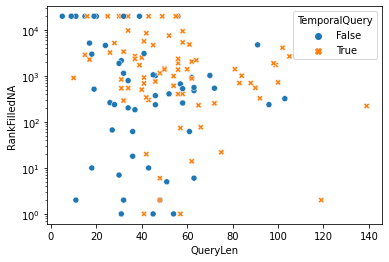

In [36]:
sns.scatterplot(data=textData,x="QueryLen",y="RankFilledNA",style="TemporalQuery", hue="TemporalQuery")
plt.yscale("log")

[Text(0, 1, '1'),
 Text(0, 10, '10'),
 Text(0, 100, '10$^2$'),
 Text(0, 1000, '10$^3$'),
 Text(0, 10000, '10$^4$'),
 Text(0, 20000, '>10$^4$')]

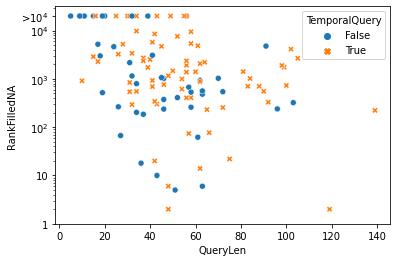

In [37]:
fig,ax = plt.subplots()
sns.scatterplot(data=textDataRestr,x="QueryLen",y="RankFilledNA",style="TemporalQuery", hue="TemporalQuery")
plt.yscale("log")

ax.set_yticks([1,10,100,1000,10000,20000])
ax.set_yticklabels([1,10,'10$^2$','10$^3$','10$^4$','>10$^4$'])
#ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

In [38]:
from scipy.stats import pearsonr
print(pearsonr(textData["QueryLen"],textData["RankFilledNA"]))
print(pearsonr(textData.loc[textData.RankFilledNA < unknownRankLimit, "QueryLen"],textData.loc[textData.RankFilledNA < unknownRankLimit, "Rank"]))

(-0.34231321182992325, 7.165162667913256e-05)
(-0.09206665486053894, 0.33876601838721054)


### Trying to account also for varying difficulty of the task 
- (4 variants with med/min and substraction vs division)

In [39]:
textDataRestr["RankMinusMin"] = textDataRestr["RankFilledNA"] - textDataRestr["task_min_rank"] + 1
textDataRestr["RankMinusMed"] = textDataRestr["RankFilledNA"] - textDataRestr["task_median_rank"]

textDataRestr["RankDivMin"] = textDataRestr["RankFilledNA"] / textDataRestr["task_min_rank"]
textDataRestr["RankDivMed"] = textDataRestr["RankFilledNA"] / textDataRestr["task_median_rank"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

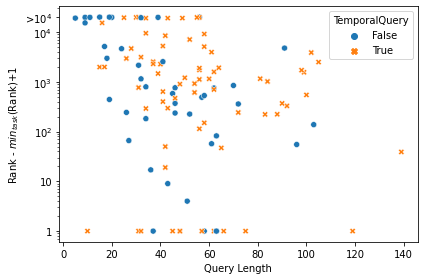

In [40]:
fig,ax = plt.subplots()
sns.scatterplot(data=textDataRestr,x="QueryLen",y="RankMinusMin",style="TemporalQuery", hue="TemporalQuery")
plt.yscale("log")
ax.set_yticks([1,10,100,1000,10000,20000])
ax.set_yticklabels([1,10,'10$^2$','10$^3$','10$^4$','>10$^4$'])
ax.set_xlabel("Query Length")
ax.set_ylabel("Rank - $min_{task}$(Rank)+1")
plt.tight_layout()
plt.savefig("queryLenVsRanking.png", dpi=300)

<AxesSubplot:xlabel='QueryLen', ylabel='RankMinusMed'>

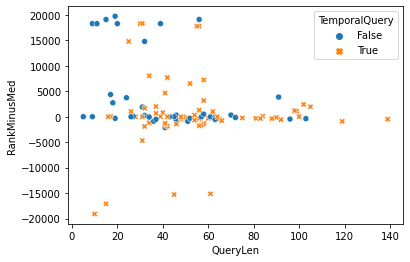

In [41]:
sns.scatterplot(data=textDataRestr,x="QueryLen",y="RankMinusMed",style="TemporalQuery", hue="TemporalQuery")

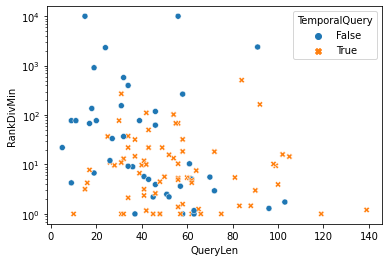

In [42]:
sns.scatterplot(data=textDataRestr,x="QueryLen",y="RankDivMin",style="TemporalQuery", hue="TemporalQuery")
plt.yscale("log")

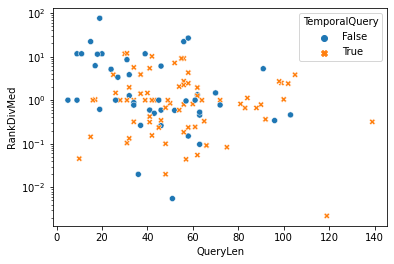

In [43]:
sns.scatterplot(data=textDataRestr,x="QueryLen",y="RankDivMed",style="TemporalQuery", hue="TemporalQuery")
plt.yscale("log")

In [44]:
print(pearsonr(textDataRestr["QueryLen"],textDataRestr["RankMinusMin"]))
print(pearsonr(textDataRestr["QueryLen"],textDataRestr["RankMinusMed"]))

print(pearsonr(textDataRestr["QueryLen"],textDataRestr["RankDivMin"]))
print(pearsonr(textDataRestr["QueryLen"],textDataRestr["RankDivMed"]))

(-0.38916098736997573, 1.8751762140013216e-05)
(-0.1748501546434109, 0.0627900339863856)
(-0.08031859769721285, 0.3956083708654788)
(-0.21808138418566092, 0.019756488680708954)


### The same analysis for Query words

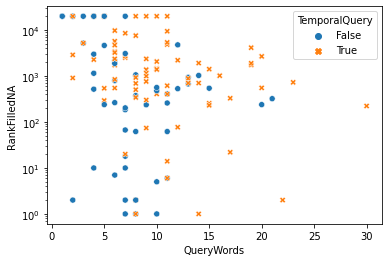

In [45]:
sns.scatterplot(data=textData,x="QueryWords",y="RankFilledNA",style="TemporalQuery", hue="TemporalQuery")
plt.yscale("log")
#zkusit vztahnout k prumerne slozitosti na tasku - mozna vyhodit tasky s prilis malo dotazy (2 a min / 5 a min)
#alternativne ne mean ale minimum
#alternativne se nedivat na odecitani ale na pomer min/aktualni
#u temporal query vyzkouset first/second/oracle a srovnat s temporal

In [46]:
print(pearsonr(textData["QueryWords"],textData["RankFilledNA"]))
print(pearsonr(textData.loc[textData.RankFilledNA < unknownRankLimit, "QueryWords"],textData.loc[textData.RankFilledNA < unknownRankLimit, "Rank"]))

(-0.39067707427817444, 4.70997172438228e-06)
(-0.1669325543245405, 0.08132386749192548)


In [47]:
print(pearsonr(textDataRestr["QueryWords"],textDataRestr["RankMinusMin"]))
print(pearsonr(textDataRestr["QueryWords"],textDataRestr["RankMinusMed"]))

print(pearsonr(textDataRestr["QueryWords"],textDataRestr["RankDivMin"]))
print(pearsonr(textDataRestr["QueryWords"],textDataRestr["RankDivMed"]))

(-0.42250517009940325, 2.8325422210949767e-06)
(-0.19916467199759352, 0.03363729056301261)
(-0.19884644420295772, 0.03392776435119852)
(-0.22775833156572495, 0.014804973270715574)


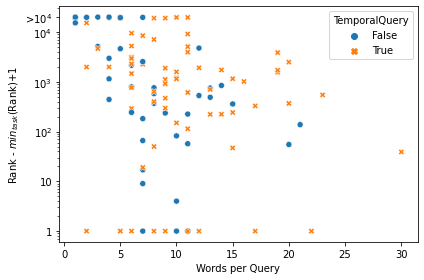

In [48]:
fig,ax = plt.subplots()
sns.scatterplot(data=textDataRestr,x="QueryWords",y="RankMinusMin",style="TemporalQuery", hue="TemporalQuery")
plt.yscale("log")
ax.set_yticks([1,10,100,1000,10000,20000])
ax.set_yticklabels([1,10,'10$^2$','10$^3$','10$^4$','>10$^4$'])
ax.set_xlabel("Words per Query")
ax.set_ylabel("Rank - $min_{task}$(Rank)+1")
plt.tight_layout()
plt.savefig("queryWordsVsRanking.png", dpi=300)

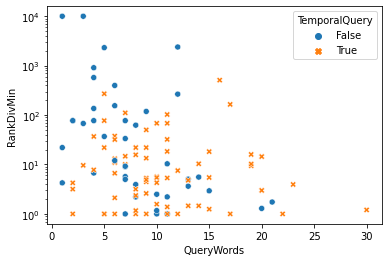

In [49]:
sns.scatterplot(data=textDataRestr,x="QueryWords",y="RankDivMin",style="TemporalQuery", hue="TemporalQuery")
plt.yscale("log")

- there is not much correlation between the length of the query and the ranking (neither str length, nor words length). However, if one adds also the queries where ranking was > 10K, there is considerable negative correlation

In [50]:
textData.groupby("TemporalQuery")[["QueryWords","QueryLen","operator","Rank","RankFilledNA","VideoRank"]].mean()

,QueryWords,QueryLen,Rank,RankFilledNA,VideoRank
TemporalQuery,,,,,
False,7.555556,40.740741,841.590909,4389.444444,882.921569
True,10.226667,54.546667,1886.121212,4059.786667,1394.915493


In [51]:
textData.groupby("TemporalQuery")[["QueryWords","QueryLen","operator","Rank","RankFilledNA","VideoRank"]].median()

,QueryWords,QueryLen,Rank,RankFilledNA,VideoRank
TemporalQuery,,,,,
False,7.0,36.5,293.0,524.5,239.0
True,9.0,50.0,961.5,1391.0,657.0


- temporal queries are (unsurprisingly) longer, but (a bit surprisingly) inferior to the normal ones. Could it be that we use temporal queries primarily for more difficult scenarios

## Ranking over time

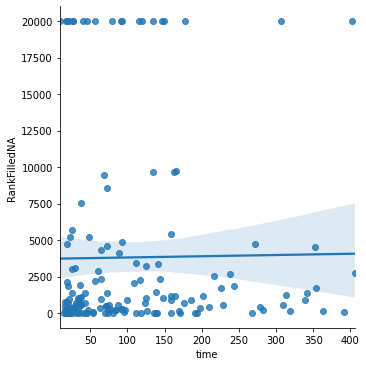

In [52]:
sns.lmplot(x="time", y="RankFilledNA", data=rankableData,
           order=1, y_jitter=.03);

In [53]:
names = rankableData.name.unique()
tNames = [f for f in names if "-t" in f]
vNames = [f for f in names if "-v" in f]
vNames

['vbs22-kis-v01',
 'vbs22-kis-v02',
 'vbs22-kis-v03',
 'vbs22-kis-v04',
 'vbs22-kis-v05',
 'vbs22-kis-v06',
 'vbs22-kis-v07',
 'vbs22-kis-v08',
 'vbs22-kis-v09',
 'vbs22-kis-v10',
 'vbs22-kis-v11',
 'vbs22-kis-v12',
 'vbs22-kis-v13']

In [54]:
filteredData["type"].unique()

array(['JointEmbedding', 'DetailWindowOpen', 'DetailWindowClose', nan,
       'VideoDetailOpen', 'VideoDetailClose', 'feedbackModel',
       'SimilarityDetailClose'], dtype=object)

In [55]:
(filteredData["ts2"] - filteredData["ts1"]).value_counts()

305    141
425    125
334      3
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\lpeska\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

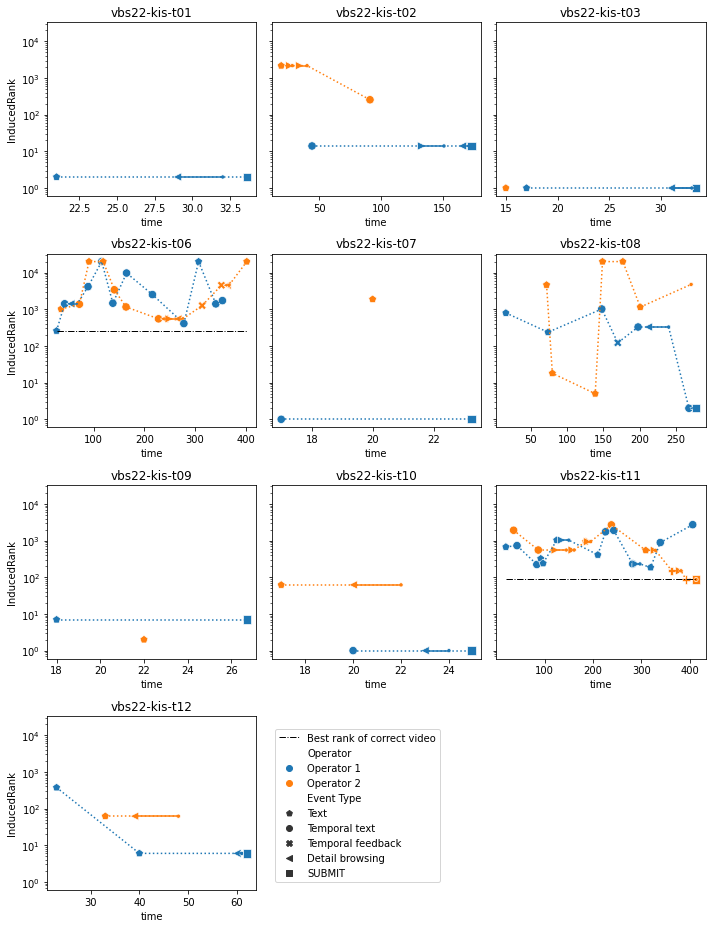

In [56]:
import math
fig,ax = plt.subplots(4,3, figsize=(10,13), sharey=True)
for i,t in enumerate(tNames):
    currAx = ax[i//3][i%3]
    
    dtTask = filteredData.loc[filteredData.name==t]
    dtTask["InducedRank"] = dtTask["Rank"]
    dtTask["Event Type"] = ""
    dtTask["Operator"] = dtTask["operator"]
    dtTask.loc[dtTask["operator"] == "LP","Operator"] = "Operator 1"
    dtTask.loc[dtTask["operator"] == "JL","Operator"] = "Operator 2"
    
    
    
    browsingPairs = []    
    for op in dtTask.operator.unique():   
        lastID = -1
        prevIDX = []
        for idx, row in dtTask.loc[dtTask.operator == op].iterrows():
            if row["category"] == "TEXT" and row["query"].startswith("Temporal CLIP:"):
                dtTask.loc[idx,"Event Type"] = "Temporal text" 
            if row["category"] == "TEXT" and row["query"].startswith("CLIP:"):
                dtTask.loc[idx,"Event Type"] = "Text" 
                
            if row["category"] == "IMAGE" and row["query"].startswith("Temporal Bayes"):
                dtTask.loc[idx,"Event Type"] = "Temporal feedback"    
            if row["category"] == "IMAGE" and row["query"].startswith("Bayes CLIP"):
                dtTask.loc[idx,"Event Type"] = "Feedback" 
                
            if row["category"] == "BROWSING" and "VideoDetailOpen" in row["type"]:
                dtTask.loc[idx,"Event Type"] = "Video browsing" 
            if row["category"] == "BROWSING" and "DetailWindowOpen" in row["type"]:
                dtTask.loc[idx,"Event Type"] = "Detail browsing"   
            if row["category"] == "IMAGE" and "JointEmbedding" in row["type"]:
                dtTask.loc[idx,"Event Type"] = "KNN search" 
            if row["category"] == "SUBMIT" :
                dtTask.loc[idx,"Event Type"] = "SUBMIT"   
                 
                
            if math.isnan(row["InducedRank"]) and (row["category"] == "TEXT" or row["category"] == "IMAGE" ):
                dtTask.loc[idx,"InducedRank"] = unknownRankLimit
            elif math.isnan(row["InducedRank"]) and lastID != -1: # browsing or submit - copy previous rank
                dtTask.loc[idx,"InducedRank"] = dtTask.loc[lastID,"InducedRank"]
            elif math.isnan(row["InducedRank"]):
                dtTask.loc[idx,"InducedRank"] = unknownRankLimit
            
            if len(prevIDX) > 0:
                if (dtTask.loc[idx,"type"] == "DetailWindowClose" or dtTask.loc[idx,"Event Type"] == "SUBMIT"):
                    for pID in prevIDX[::-1]:
                        if (dtTask.loc[pID,"type"] == "DetailWindowOpen"):                    
                            browsingPairs.append(dtTask.loc[[pID,idx]])
                            break
                        elif (dtTask.loc[pID,"type"] == "DetailWindowClose"):   
                            break
                if (dtTask.loc[idx,"type"] == "VideoDetailClose" or dtTask.loc[idx,"Event Type"] == "SUBMIT"):
                    for pID in prevIDX[::-1]:
                        if (dtTask.loc[pID,"type"] == "VideoDetailOpen"):                    
                            browsingPairs.append(dtTask.loc[[pID,idx]])
                            break
                        elif (dtTask.loc[pID,"type"] == "VideoDetailClose"):   
                            break
                if (dtTask.loc[idx,"type"] == "SimilarityDetailClose" or dtTask.loc[idx,"Event Type"] == "SUBMIT"):
                    for pID in prevIDX[::-1]:
                        if (dtTask.loc[pID,"category"] == "IMAGE" and dtTask.loc[pID,"type"] == "JointEmbedding"):                    
                            browsingPairs.append(dtTask.loc[[pID,idx]])
                            break
                        elif (dtTask.loc[pID,"type"] == "SimilarityDetailClose"):   
                            break                            
                            
            """        
            if (dtTask.loc[idx,"type"] == "VideoDetailClose" or dtTask.loc[idx,"type"] == "SimilarityDetailClose"):
                    timeFirst = dtTask.loc[idx,"timeRef"]
                    timeSecond = dtTask.loc[idx,"time"]
                    dfx = pd.DataFrame({
                        'InducedRank':[dtTask.loc[idx,"InducedRank"],dtTask.loc[idx,"InducedRank"]],
                        'time':[timeFirst,timeSecond],
                        "Operator":[dtTask.loc[idx,"Operator"],dtTask.loc[idx,"Operator"]]                                                
                    })
                    browsingPairs.append(dfx)
            """
            lastID = idx
            prevIDX.append(idx)
            


            
    
    
    
    #dtTaskRankable = dtTask.loc[((dtTask.category != "BROWSING") & (dtTask.category != "SUBMIT"))]
    legend = False
    if i==5:
        legend = True
        
  
    sns.scatterplot(data=dtTask, x="time", y="InducedRank", ax=currAx, hue="Operator", 
                   hue_order=["Operator 1","Operator 2"], style="Event Type", legend=legend, s=70,
                   markers={"Temporal text":"o","Text":"p",
                            "Temporal feedback":"X", "Feedback":"P",
                            "KNN search":"*",        
                            "Video browsing":">",
                            "Detail browsing":"<",
                            "SUBMIT":"s",
                            "":"."
                           })
    sns.lineplot(data=dtTask, x='time', y='InducedRank',  ax=currAx, hue="Operator",  hue_order=["Operator 1","Operator 2"], legend=False, linestyle=':')
    
    for bp in browsingPairs:
        sns.lineplot(data=bp, x='time', y='InducedRank',  ax=currAx, hue="Operator",  hue_order=["Operator 1","Operator 2"], legend=False, linestyle='-')
          

    if dtTask["Rank"].min() > 50: #overall, we only got some bad results
        VideoRankMin = dtTask["VideoRank"].min()
        
        x, y = [dtTask["time"].min(), dtTask["time"].max()], [VideoRankMin, VideoRankMin]
        currAx.plot(x, y, "-.", color="black",linewidth=1.0, label="Best rank of correct video")   
        handlesX, labelsX = currAx.get_legend_handles_labels()
        
    currAx.set_title(t)
    
plt.yscale("log")


handles, labels = ax[1,2].get_legend_handles_labels()
fig.legend(handlesX+handles, labelsX+labels, loc='upper left', bbox_to_anchor=(0.38, 0.222))
ax[1,2].get_legend().remove()

fig.delaxes(ax[3,1])
fig.delaxes(ax[3,2])
plt.tight_layout()  

plt.savefig("textualKIS.png", dpi=300)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

37.0 37.0
77.0 77.0
6.0 6.0
22.0 22.0
44.0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

 1.0
6.0 1.0
2.0 1.0
9.0 9.0
5.0 5.0
1.0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

 1.0
4705.0 27.0
2.0 2.0
239.0 2.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

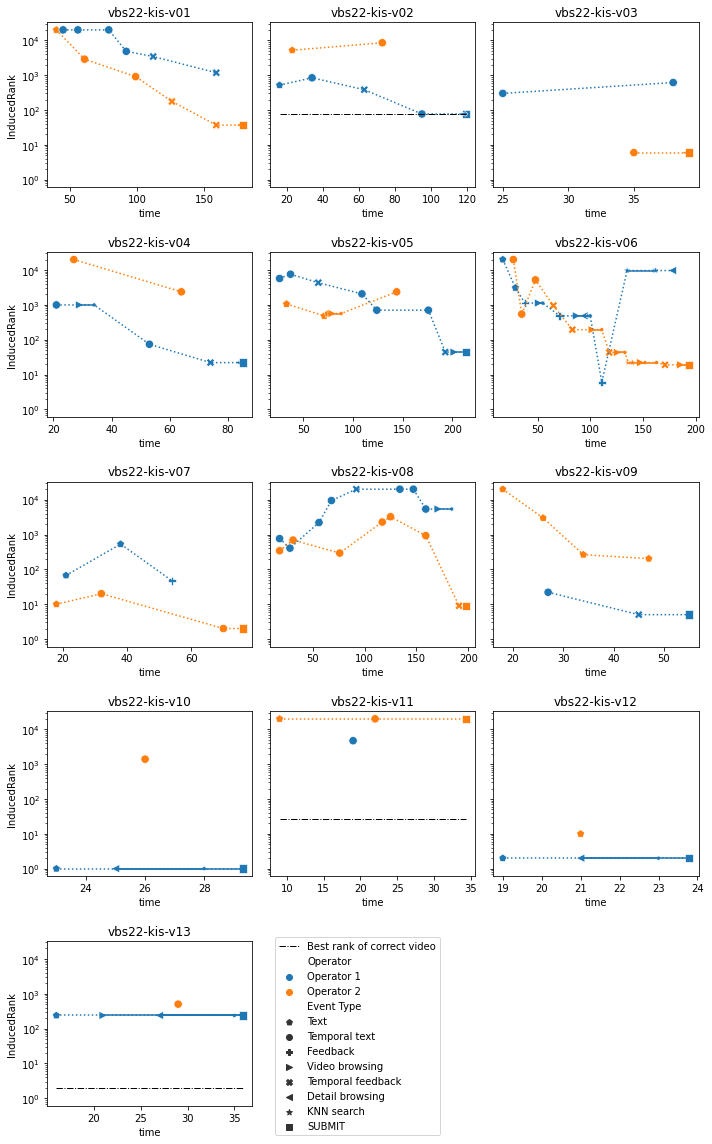

In [57]:
import math
fig,ax = plt.subplots(5,3, figsize=(10,16), sharey=True)
for i,t in enumerate(vNames):
    currAx = ax[i//3][i%3]
    

    dtTask = filteredData.loc[filteredData.name==t]
    dtTask["InducedRank"] = dtTask["Rank"]
    dtTask["Event Type"] = ""
    dtTask["Operator"] = dtTask["operator"]
    dtTask.loc[dtTask["operator"] == "LP","Operator"] = "Operator 1"
    dtTask.loc[dtTask["operator"] == "JL","Operator"] = "Operator 2"
    
    
    
    browsingPairs = []    
    for op in dtTask.operator.unique():   
        lastID = -1
        prevIDX = []
        for idx, row in dtTask.loc[dtTask.operator == op].iterrows():
            if row["category"] == "TEXT" and row["query"].startswith("Temporal CLIP:"):
                dtTask.loc[idx,"Event Type"] = "Temporal text" 
            if row["category"] == "TEXT" and row["query"].startswith("CLIP:"):
                dtTask.loc[idx,"Event Type"] = "Text" 
                
            if row["category"] == "IMAGE" and row["query"].startswith("Temporal Bayes"):
                dtTask.loc[idx,"Event Type"] = "Temporal feedback"    
            if row["category"] == "IMAGE" and row["query"].startswith("Bayes CLIP"):
                dtTask.loc[idx,"Event Type"] = "Feedback" 
                
            if row["category"] == "BROWSING" and "VideoDetailOpen" in row["type"]:
                dtTask.loc[idx,"Event Type"] = "Video browsing" 
            if row["category"] == "BROWSING" and "DetailWindowOpen" in row["type"]:
                dtTask.loc[idx,"Event Type"] = "Detail browsing"   
            if row["category"] == "IMAGE" and "JointEmbedding" in row["type"]:
                dtTask.loc[idx,"Event Type"] = "KNN search" 
            if row["category"] == "SUBMIT" :
                dtTask.loc[idx,"Event Type"] = "SUBMIT"   
                 
                
            if math.isnan(row["InducedRank"]) and (row["category"] == "TEXT" or row["category"] == "IMAGE" ):
                dtTask.loc[idx,"InducedRank"] = unknownRankLimit
            elif math.isnan(row["InducedRank"]) and lastID != -1: # browsing or submit - copy previous rank
                dtTask.loc[idx,"InducedRank"] = dtTask.loc[lastID,"InducedRank"]
            elif math.isnan(row["InducedRank"]):
                dtTask.loc[idx,"InducedRank"] = unknownRankLimit
            
            if len(prevIDX) > 0:
                if (dtTask.loc[idx,"type"] == "DetailWindowClose" or dtTask.loc[idx,"Event Type"] == "SUBMIT"):
                    for pID in prevIDX[::-1]:
                        if (dtTask.loc[pID,"type"] == "DetailWindowOpen"):                    
                            browsingPairs.append(dtTask.loc[[pID,idx]])
                            break
                        elif (dtTask.loc[pID,"type"] == "DetailWindowClose"):   
                            break
                if (dtTask.loc[idx,"type"] == "VideoDetailClose" or dtTask.loc[idx,"Event Type"] == "SUBMIT"):
                    for pID in prevIDX[::-1]:
                        if (dtTask.loc[pID,"type"] == "VideoDetailOpen"):                    
                            browsingPairs.append(dtTask.loc[[pID,idx]])
                            break
                        elif (dtTask.loc[pID,"type"] == "VideoDetailClose"):   
                            break
                if (dtTask.loc[idx,"type"] == "SimilarityDetailClose" or dtTask.loc[idx,"Event Type"] == "SUBMIT"):
                    for pID in prevIDX[::-1]:
                        if (dtTask.loc[pID,"category"] == "IMAGE" and dtTask.loc[pID,"type"] == "JointEmbedding"):                    
                            browsingPairs.append(dtTask.loc[[pID,idx]])
                            break
                        elif (dtTask.loc[pID,"type"] == "SimilarityDetailClose"):   
                            break                            
                            
            """        
            if (dtTask.loc[idx,"type"] == "VideoDetailClose" or dtTask.loc[idx,"type"] == "SimilarityDetailClose"):
                    timeFirst = dtTask.loc[idx,"timeRef"]
                    timeSecond = dtTask.loc[idx,"time"]
                    dfx = pd.DataFrame({
                        'InducedRank':[dtTask.loc[idx,"InducedRank"],dtTask.loc[idx,"InducedRank"]],
                        'time':[timeFirst,timeSecond],
                        "Operator":[dtTask.loc[idx,"Operator"],dtTask.loc[idx,"Operator"]]                                                
                    })
                    browsingPairs.append(dfx)
            """
            lastID = idx
            prevIDX.append(idx)            


            
    
    
    
    #dtTaskRankable = dtTask.loc[((dtTask.category != "BROWSING") & (dtTask.category != "SUBMIT"))]
    legend = False
    if i==5:
        legend = True
        
  
    sns.scatterplot(data=dtTask, x="time", y="InducedRank", ax=currAx, hue="Operator", 
                   hue_order=["Operator 1","Operator 2"], style="Event Type", legend=legend, s=70,
                   markers={"Temporal text":"o","Text":"p",
                            "Temporal feedback":"X", "Feedback":"P",
                            "KNN search":"*",        
                            "Video browsing":">",
                            "Detail browsing":"<",
                            "SUBMIT":"s",
                            "":"."
                           })
    sns.lineplot(data=dtTask, x='time', y='InducedRank',  ax=currAx, hue="Operator",  hue_order=["Operator 1","Operator 2"], legend=False, linestyle=':')
    
    for bp in browsingPairs:
        sns.lineplot(data=bp, x='time', y='InducedRank',  ax=currAx, hue="Operator",  hue_order=["Operator 1","Operator 2"], legend=False, linestyle='-')
          
    print(dtTask["Rank"].min(),dtTask["VideoRank"].min())
    if dtTask["Rank"].min() > 50: #overall, we only got some bad results
        VideoRankMin = dtTask["VideoRank"].min()
        
        x, y = [dtTask["time"].min(), dtTask["time"].max()], [VideoRankMin, VideoRankMin]
        currAx.plot(x, y, "-.", color="black",linewidth=1.0, label="Best rank of correct video")   
        handlesX, labelsX = currAx.get_legend_handles_labels()
        
    currAx.set_title(t)
    
plt.yscale("log")


fig.delaxes(ax[4,1])
fig.delaxes(ax[4,2])
plt.tight_layout()  

handles, labels = ax[1,2].get_legend_handles_labels()
fig.legend(handlesX+handles, labelsX+labels, loc='upper left', bbox_to_anchor=(0.38, 0.187))
#fig.legend(handlesX, labelsX, loc='lower left', bbox_to_anchor=(0.68, 0.045))

ax[1,2].get_legend().remove()

plt.savefig("visualKIS.png", dpi=300)

In [58]:
searchChains = []
searchInd = []
searchChain = []
for task in rankableData.name.unique():
    #print(task)
    for op in rankableData.operator.unique():
        #print(op)
        taskData = rankableData.loc[((rankableData.name == task)&(rankableData.operator == op))]
        
        if len(searchChain)>=2: #previous search chain should be sent
                searchChains.append(searchChain)
        searchChain = []
        for i, row in taskData.iterrows():
            if row["category"] == "IMAGE" and row["type"] == "feedbackModel":
                searchChain.append(row)
            if row["category"] == "TEXT" and len(searchChain)>=2: #previous search chain should be sent
                searchChains.append(searchChain)
            elif row["category"] == "TEXT" and len(searchChain)==1:
                searchInd.append(searchChain)
            if row["category"] == "TEXT": #new chain is initiated
                searchChain = []
                searchChain.append(row)

In [59]:
for sc in searchChains:
    row=[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
    for i,s in enumerate(sc):

        print(s.query)

Temporal CLIP: vase wooden fame slate > our weeding
Temporal Bayes CLIP 17126:4248_13575:5775_13583:962_15814:2525_17126:1581_4103:8804_2342:3102_11095:881_12379:9545_10002:3840_| group:1|4103:8886_
Temporal Bayes CLIP 4103:8804_17126:4248_8265:1935_678:156_2842:1506_9679:6031_7464:3117_17125:2272_13583:962_2342:2952_| group:2|2141:2945_
Temporal CLIP: mountain walley with a river in the centre > small lila flowers
Temporal Bayes CLIP 16575:2388_3849:8162_10883:288_8301:2038_3849:7531_2177:10656_16470:11658_8728:4556_8960:4038_15650:3331_| group:1|16575:2412_3849:8300_| group:2|199:4538_10563:5724_10563:5769_
Temporal Bayes CLIP 199:4081_5911:5875_10563:5440_2854:1038_14063:22110_1339:4312_3849:10881_4542:11175_2015:3194_2692:360_| group:1|3131:450_6195:1635_2854:3050_| group:2|13982:5106_199:20525_
Temporal CLIP: lilac > rain
Temporal Bayes CLIP 14855:96_14676:6288_16302:707_1872:6294_13597:2575_5627:6_16976:33162_15888:450_8580:3698_1872:5177_| group:1|8580:3644_
Temporal Bayes CLIP 

In [60]:
len(searchChains)

15

In [61]:
len(searchInd)

79

In [62]:
scDFs = []
scDFLens = []
for sc in searchChains:
    scDF = pd.DataFrame(sc)
    scDFs.append(scDF)
    scDFLens.append(len(scDF))


In [63]:
np.array(scDFLens).mean()

2.6

In [64]:
np.median(np.array(scDFLens))

2.0

- there is just a few chain searches where there is a relevance feedback supplied after a text search (15)
- in most cases, they are short (only one feedback iteration after the text search)
- however, in the vast majority, they improved the search ranks

In [65]:
searchInd

[[name                                    vbs22-kis-t02
  ts1                                        1654506752
  ts2                                        1654507177
  GT                               5863: 2650-2950 : 25
  LogSize                                       10000.0
  Rank GT+2x5s                                    508.0
  Rank                                           2168.0
  VideoRank                                       244.0
  time                                             19.0
  ts                                       1654506776.0
  category                                         TEXT
  type                                   JointEmbedding
  query           CLIP: wooden bridge seen from a creek
  filter                                            NaN
  operator                                           JL
  timeRef                                            -6
  RankFilledNA                                   2168.0
  Name: 176, dtype: object],
 [name             

In [66]:
ranksSoloQuery = [f[0]["RankFilledNA"] for f in searchInd]


In [67]:
posFirst = []
posSecond = []
posLast = []
for sc in scDFs:
    posFirst.append( sc.iloc[0]["RankFilledNA"])
    posSecond.append( sc.iloc[1]["RankFilledNA"])
    posLast.append( sc.iloc[-1]["RankFilledNA"])   

In [68]:
posDF = pd.DataFrame({"text":posFirst,"first":posSecond, "last":posLast})
posDF

,text,first,last
0,549.0,1261.0,4532.0
1,4855.0,3436.0,1177.0
2,909.0,176.0,37.0
3,1018.0,122.0,122.0
4,543.0,150.0,87.0
5,843.0,384.0,384.0
6,74.0,22.0,22.0
7,7576.0,4323.0,4323.0
8,704.0,44.0,44.0
9,3087.0,1125.0,6.0


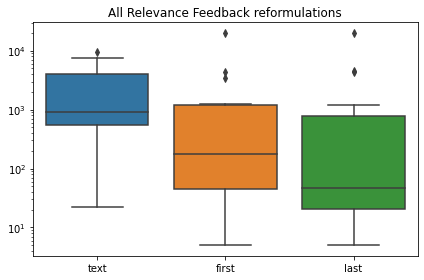

In [69]:
sns.boxplot(data=posDF)
plt.yscale("log")
plt.title("All Relevance Feedback reformulations")
plt.tight_layout()
plt.savefig("reformulations.png", dpi=300)

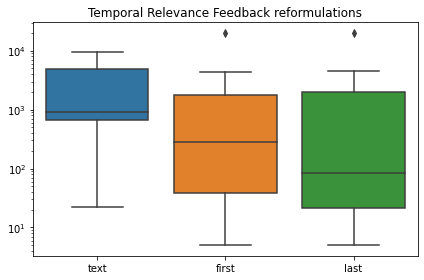

In [70]:
searchChains = []
searchChain = []
for task in rankableData.name.unique():
    #print(task)
    for op in rankableData.operator.unique():
        #print(op)
        taskData = rankableData.loc[((rankableData.name == task)&(rankableData.operator == op))]
        
        if len(searchChain)>=2: #previous search chain should be sent
                searchChains.append(searchChain)
        searchChain = []
        for i, row in taskData.iterrows():
            if row["category"] == "IMAGE" and row["query"].startswith("Temporal Bayes"):
                searchChain.append(row)
            if row["category"] == "TEXT" and len(searchChain)>=2: #previous search chain should be sent
                searchChains.append(searchChain)
            if row["category"] == "TEXT": #new chain is initiated
                searchChain = []
                searchChain.append(row)
scDFs = []
scDFLens = []
for sc in searchChains:
    scDF = pd.DataFrame(sc)
    scDFs.append(scDF)
    scDFLens.append(len(scDF))
    
posFirst = []
posSecond = []
posLast = []
for sc in scDFs:
    posFirst.append( sc.iloc[0]["RankFilledNA"])
    posSecond.append( sc.iloc[1]["RankFilledNA"])
    posLast.append( sc.iloc[-1]["RankFilledNA"]) 
    
posDF = pd.DataFrame({"text":posFirst,"first":posSecond, "last":posLast})

sns.boxplot(data=posDF)
plt.yscale("log")
plt.title("Temporal Relevance Feedback reformulations")
plt.tight_layout()
plt.savefig("reformulationsTemporal.png", dpi=300)

In [71]:
for sc in searchChains:
    row=[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
    for i,s in enumerate(sc):
        if i==0:
            pass
        else:
            g = s["query"].split("|")
            dctVolumes = {}
            if len(g) >=3:
                dctVolumes[g[1]] = g[2].count('_')
            if len(g) >=5:
                dctVolumes[g[3]] = g[4].count('_')            
            print(dctVolumes)
            break

{' group:1': 1}
{' group:1': 2, ' group:2': 3}
{' group:1': 1}
{' group:1': 1, ' group:2': 1}
{' group:1': 2}
{' group:1': 1, ' group:2': 1}
{' group:1': 1, ' group:2': 1}
{' group:1': 1, ' group:2': 1}
{' group:1': 1}
{' group:1': 1, ' group:2': 1}
{' group:1': 1, ' group:2': 1}
{' group:1': 1, ' group:2': 1}


In [72]:
rows = []
for sc in searchChains:
    row=[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
    for i,s in enumerate(sc):
        if i==0:
            row[i] = s.Rank
        else:
            g = s["query"].split("|")
            dctVolumes = {}
            if len(g) >=3:
                dctVolumes[g[1]] = g[2].count('_')
            if len(g) >=5:
                dctVolumes[g[3]] = g[4].count('_') 
            s1 =  dctVolumes.get(' group:1',0)   
            s2 =  dctVolumes.get(' group:2',0)   
            
            row[i*2] = "("+str(s1)+" / "+str(s2)+")"
            row[i*2-1] = s.Rank
    rows.append(row)
dfTab = pd.DataFrame(rows, columns=['Rank text','Rank R1','#Feedback 1','Rank R2','#Feedback 2','Rank R3','#Feedback 3','Rank R4','#Feedback 4'])
dfTab     

,Rank text,Rank R1,#Feedback 1,Rank R2,#Feedback 2,Rank R3,#Feedback 3,Rank R4,#Feedback 4
0,549.0,1261.0,(1 / 0),4532.0,(0 / 1),NaN,NaN,NaN,NaN
1,4855.0,3436.0,(2 / 3),1177.0,(3 / 2),NaN,NaN,NaN,NaN
2,909.0,176.0,(1 / 0),37.0,(2 / 0),NaN,NaN,NaN,NaN
3,1018.0,122.0,(1 / 1),NaN,NaN,NaN,NaN,NaN,NaN
4,843.0,384.0,(2 / 0),NaN,NaN,NaN,NaN,NaN,NaN
5,74.0,22.0,(1 / 1),NaN,NaN,NaN,NaN,NaN,NaN
6,7576.0,4323.0,(1 / 1),NaN,NaN,NaN,NaN,NaN,NaN
7,704.0,44.0,(1 / 1),NaN,NaN,NaN,NaN,NaN,NaN
8,5214.0,955.0,(1 / 0),194.0,(1 / 0),43.0,(1 / 0),19.0,(1 / 0)
9,9437.0,NaN,(1 / 1),NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
dfTab = dfTab.astype(str).replace("nan","")
for c in dfTab.columns:
    dfTab[c] = dfTab[c].str.replace("\\.0","")
print(dfTab.to_latex())

\begin{tabular}{llllllllll}
\toprule
{} & Rank text & Rank R1 & \#Feedback 1 & Rank R2 & \#Feedback 2 & Rank R3 & \#Feedback 3 & Rank R4 & \#Feedback 4 \\
\midrule
0  &       549 &    1261 &     (1 / 0) &    4532 &     (0 / 1) &         &             &         &             \\
1  &      4855 &    3436 &     (2 / 3) &    1177 &     (3 / 2) &         &             &         &             \\
2  &       909 &     176 &     (1 / 0) &      37 &     (2 / 0) &         &             &         &             \\
3  &      1018 &     122 &     (1 / 1) &         &             &         &             &         &             \\
4  &       843 &     384 &     (2 / 0) &         &             &         &             &         &             \\
5  &        74 &      22 &     (1 / 1) &         &             &         &             &         &             \\
6  &      7576 &    4323 &     (1 / 1) &         &             &         &             &         &             \\
7  &       704 &      44 &     (1 / 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
rankableData.head(50)

,name,ts1,ts2,GT,LogSize,Rank GT+2x5s,Rank,VideoRank,time,ts,category,type,query,filter,operator,timeRef,RankFilledNA
0,vbs22-kis-t01,1654506255,1654506680,13964: 7595-7850 : 25,10000.0,2.0,2.0,2.0,21.0,1.654506e+09,TEXT,JointEmbedding,CLIP: close-up of motorbike exhaust pipe being...,NaN,LP,-6,2.0
176,vbs22-kis-t02,1654506752,1654507177,5863: 2650-2950 : 25,10000.0,508.0,2168.0,244.0,19.0,1.654507e+09,TEXT,JointEmbedding,CLIP: wooden bridge seen from a creek,NaN,JL,-6,2168.0
4,vbs22-kis-t02,1654506753,1654507178,5863: 2650-2950 : 25,10000.0,14.0,14.0,14.0,44.0,1.654507e+09,TEXT,JointEmbedding,Temporal CLIP: rocks hanging over a wooden wal...,NaN,LP,-6,14.0
181,vbs22-kis-t02,1654506752,1654507177,5863: 2650-2950 : 25,10000.0,143.0,255.0,80.0,91.0,1.654507e+09,TEXT,JointEmbedding,Temporal CLIP: rocks on the right and gorge on...,NaN,JL,-6,255.0
182,vbs22-kis-t03,1654507318,1654507743,12262: 128-375 : 25,10000.0,1.0,1.0,1.0,15.0,1.654507e+09,TEXT,JointEmbedding,CLIP: caravan and a horse on a meadow,NaN,JL,-6,1.0
10,vbs22-kis-t03,1654507319,1654507744,12262: 128-375 : 25,10000.0,1.0,1.0,1.0,17.0,1.654507e+09,TEXT,JointEmbedding,CLIP: brown-white caravan and a horse in the m...,NaN,LP,-6,1.0
14,vbs22-kis-t06,1654510855,1654511280,4396: 192-360 : 24,10000.0,259.0,259.0,259.0,27.0,1.654511e+09,TEXT,JointEmbedding,CLIP: vase glass leather cases and wooden fram...,NaN,LP,-6,259.0
189,vbs22-kis-t06,1654510854,1654511279,4396: 192-360 : 24,10000.0,1018.0,1018.0,1018.0,36.0,1.654511e+09,TEXT,JointEmbedding,CLIP: glass vase leather case and wooden frame...,NaN,JL,-6,1018.0
15,vbs22-kis-t06,1654510855,1654511280,4396: 192-360 : 24,10000.0,1414.0,1414.0,1414.0,43.0,1.654511e+09,TEXT,JointEmbedding,Temporal CLIP: vase glass leather cases and wo...,NaN,LP,-6,1414.0
190,vbs22-kis-t06,1654510854,1654511279,4396: 192-360 : 24,10000.0,1376.0,1376.0,1376.0,72.0,1.654511e+09,TEXT,JointEmbedding,Temporal CLIP: glass vase leather case and woo...,NaN,JL,-6,1376.0


[TODO] why there was the lack of relevance feedback? Was it that initial text query was so good? Or too bad so reformulation was needed?
- get all search chains and compare initial rating of those with len=1 and len>1

## Analyse when there was a good reason for rel. feedback

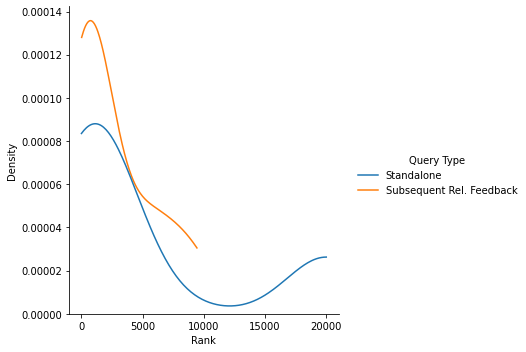

In [75]:
def dict2pandas(d, keyname, valname):
    dframes = []
    for k,v in d.items():
        dframes += [pd.DataFrame({keyname : [k] * len(v), valname : v})]
    return pd.concat(dframes)
data = {
    'Standalone' : ranksSoloQuery,
    'Subsequent Rel. Feedback' : posFirst
}

dataDF = dict2pandas(data, 'Query Type', 'Rank')
dataDF.reset_index(inplace=True)
sns.displot(data=dataDF,x="Rank",hue='Query Type', kind="kde", common_norm=False, cut=0)#, y='Rank', split=True, cut=0
#plt.ylabel("")
#plt.tight_layout()
#plt.yscale("log")
#plt.yticks([1,10,100,1000,10000,20000],["1","10","10$^2$","10$^3$","10$^4$",">10$^4$"])

#